# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key

#define API key
api_key = weather_api_key


## Generate Cities List

In [3]:
#Import citipy 
from citipy import citipy

#make lists for cities and latitudes and longitudes
lats_longs = []
cities = []

# Make an random list of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = zip(lats, longs)

# Find the nearest city for each latitude and longitude
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
       
    # If the city is unique, then add it to the cities list
    if city not in cities:

        cities.append(city)

# Print number of cities
print(len(cities))

595


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Make base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

#Start record count and set count number at 1
record_count = 1
set_count = 1

#create list to fill with city data
city_data = []

#Iterate over each row
for i, city in enumerate(cities):
    #Set time delay to avoid api requests being denied.
    time.sleep(0.25)
    #limit each set to 50 and add new sets starting the record count over at zero.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #print record and set count along with city name
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    #add to record count
    record_count += 1
    url = f"{base_url}&q={city}"
    #perform requests for api data for all variables needed
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        long = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Add data requested into city_data and convert to dictionary
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : long,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date
                      })
    #add exceptions when city is not found to keep the code running
    except:
        #add print statement for when exception is found
        print('city not found.Skipping...')

        pass

#print when done running
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of set 1 | tura
Processing Record 2 of set 1 | barrow
Processing Record 3 of set 1 | kodiak
Processing Record 4 of set 1 | muros
Processing Record 5 of set 1 | dubenskiy
city not found.Skipping...
Processing Record 6 of set 1 | ushuaia
Processing Record 7 of set 1 | bokspits
city not found.Skipping...
Processing Record 8 of set 1 | huarmey
Processing Record 9 of set 1 | nikolskoye
Processing Record 10 of set 1 | punta arenas
Processing Record 11 of set 1 | yellowknife
Processing Record 12 of set 1 | uhlove
Processing Record 13 of set 1 | georgetown
Processing Record 14 of set 1 | puerto ayora
Processing Record 15 of set 1 | nanortalik
Processing Record 16 of set 1 | saint george
Processing Record 17 of set 1 | grand river south east
city not found.Skipping...
Processing Record 18 of set 1 | louisbourg
city not found.Skipping...
Processing Record 19 of set 1 | illoqqortoormiut
city not found.Skipping...
Processing Record 20 of set 1 | pinotepa de don luis
Processing 

Processing Record 38 of set 4 | pedasi
Processing Record 39 of set 4 | tsumeb
Processing Record 40 of set 4 | saskylakh
Processing Record 41 of set 4 | aimores
Processing Record 42 of set 4 | grand baie
Processing Record 43 of set 4 | galesong
Processing Record 44 of set 4 | sao filipe
Processing Record 45 of set 4 | saleaula
city not found.Skipping...
Processing Record 46 of set 4 | muborak
Processing Record 47 of set 4 | severo-kurilsk
Processing Record 48 of set 4 | kuminskiy
Processing Record 49 of set 4 | victoria
Processing Record 0 of set 5 | ignatovka
Processing Record 1 of set 5 | rio grande
Processing Record 2 of set 5 | yulara
Processing Record 3 of set 5 | kulhudhuffushi
Processing Record 4 of set 5 | hasaki
Processing Record 5 of set 5 | jumla
Processing Record 6 of set 5 | mecca
Processing Record 7 of set 5 | dukat
Processing Record 8 of set 5 | labuhan
Processing Record 9 of set 5 | coquimbo
Processing Record 10 of set 5 | belushya guba
city not found.Skipping...
Process

Processing Record 25 of set 8 | portsmouth
Processing Record 26 of set 8 | sola
Processing Record 27 of set 8 | sao joao da barra
Processing Record 28 of set 8 | los llanos de aridane
Processing Record 29 of set 8 | lamu
Processing Record 30 of set 8 | bani
Processing Record 31 of set 8 | san rafael del sur
Processing Record 32 of set 8 | taksimo
Processing Record 33 of set 8 | san ramon
Processing Record 34 of set 8 | mnogovershinnyy
Processing Record 35 of set 8 | riyadh
Processing Record 36 of set 8 | fukue
Processing Record 37 of set 8 | port keats
Processing Record 38 of set 8 | vanimo
Processing Record 39 of set 8 | tiarei
Processing Record 40 of set 8 | livramento
Processing Record 41 of set 8 | hambantota
Processing Record 42 of set 8 | ulaangom
Processing Record 43 of set 8 | malatap
Processing Record 44 of set 8 | muncar
Processing Record 45 of set 8 | halvad
Processing Record 46 of set 8 | coari
Processing Record 47 of set 8 | nalut
Processing Record 48 of set 8 | teya
Proce

Processing Record 10 of set 12 | xingcheng
Processing Record 11 of set 12 | muroto
Processing Record 12 of set 12 | whitehorse
Processing Record 13 of set 12 | ilhabela
Processing Record 14 of set 12 | andenes
Processing Record 15 of set 12 | lere
Processing Record 16 of set 12 | whyalla
Processing Record 17 of set 12 | pontianak
Processing Record 18 of set 12 | marawi
Processing Record 19 of set 12 | sayville
Processing Record 20 of set 12 | montrose
Processing Record 21 of set 12 | hanchuan
Processing Record 22 of set 12 | petatlan
Processing Record 23 of set 12 | hualmay
Processing Record 24 of set 12 | abu dhabi
Processing Record 25 of set 12 | vallenar
Processing Record 26 of set 12 | doos
Processing Record 27 of set 12 | tabou
Processing Record 28 of set 12 | simbakoro
Processing Record 29 of set 12 | attawapiskat
city not found.Skipping...
Processing Record 30 of set 12 | kaa-khem
Processing Record 31 of set 12 | sosva
Processing Record 32 of set 12 | porto walter
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dataframe from api data collected
city_weather_df = pd.DataFrame.from_dict(city_data) 

#save data to csv
city_weather_csv = city_weather_df.to_csv("output_data/city_weather.csv", encoding="utf-8", index=True)

#print dataframe
city_weather_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,tura,72.64,90,90.22,25.52,0,IN,1.63,1603055527
1,barrow,21.20,85,-156.79,71.29,75,US,11.41,1603055561
2,kodiak,44.60,75,-152.41,57.79,75,US,10.29,1603055561
3,muros,57.99,84,-9.06,42.78,99,ES,7.45,1603055562
4,ushuaia,41.00,80,-68.30,-54.80,75,AR,29.97,1603055358
...,...,...,...,...,...,...,...,...,...
532,antofagasta,59.00,82,-70.40,-23.65,90,CL,12.75,1603055769
533,namie,46.99,66,141.00,37.48,41,JP,4.72,1603055770
534,erenhot,43.12,54,111.98,43.65,0,CN,12.46,1603055770
535,muhos,36.00,93,25.99,64.81,90,FI,8.05,1603055771


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

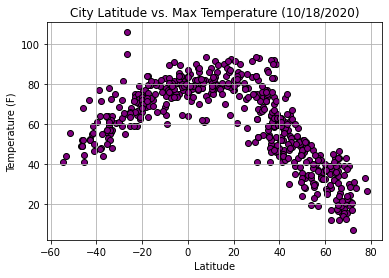

In [9]:
#define variables
city_lat = city_weather_df["Latitude"]
city_temp = city_weather_df["Temperature"]
date = datetime.date.today()
date = time.strftime("(%m/%d/%Y)")

#set plot parameters
plt.scatter(city_lat, city_temp, marker="o", facecolor="purple", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Temperature.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

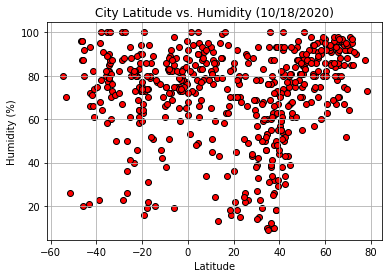

In [10]:
#define variables
city_humid = city_weather_df["Humidity"]

#set plot parameters
plt.scatter(city_lat, city_humid, marker="o", facecolor="red", edgecolor="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Humidity.png")

#show plot
plt.show()


## Latitude vs. Cloudiness Plot

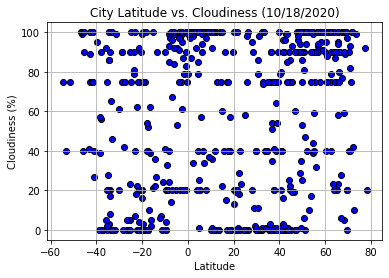

In [11]:
#define variables
city_cloud = city_weather_df["Cloudiness"]

#set plot parameters
plt.scatter(city_lat, city_cloud, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

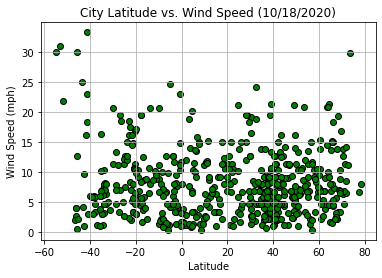

In [12]:
#define variables
city_wind = city_weather_df["Windspeed"]

#set plot parameters
plt.scatter(city_lat, city_wind, marker="o", facecolor="green", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Wind_speed.png")

#show plot
plt.show()


## Linear Regression

In [13]:
#"seperate" northern and southern hemispheres
north_hemi = city_weather_df.loc[city_weather_df["Latitude"]>=0]
south_hemi = city_weather_df.loc[city_weather_df["Latitude"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.86


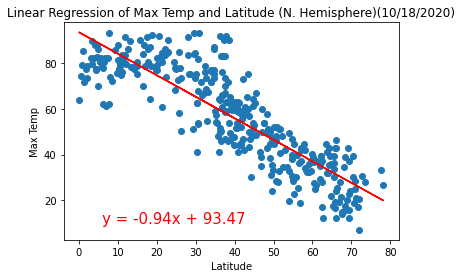

In [14]:
#define variables
north_lat = north_hemi["Latitude"]
north_temp = north_hemi["Temperature"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_temp, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_temp
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_MaxTemp_vs_Lat_regression.png")

#display chart
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.77


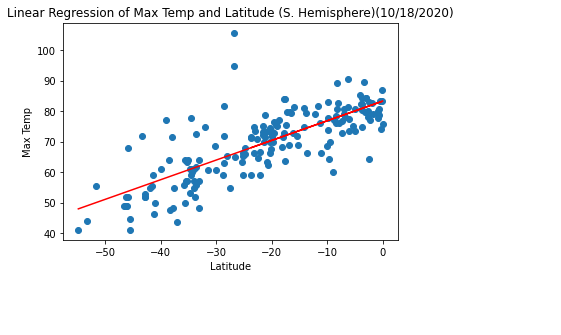

In [15]:
#define variables
south_lat = south_hemi["Latitude"]
south_temp = south_hemi["Temperature"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_temp, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_temp
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_MaxTemp_vs_Lat_regression.png")

#display chart
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27


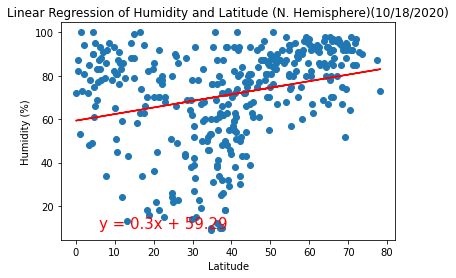

In [16]:
#define variables
north_humid = north_hemi["Humidity"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_humid, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_humid
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Humidity_vs_Lat_regression.png")

#display chart
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0


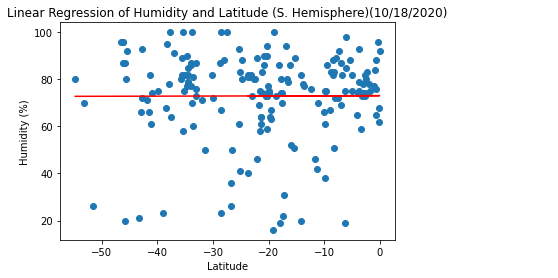

In [17]:
#define variables
south_humid = south_hemi["Humidity"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_humid, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_humid
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Humidity_vs_Lat_regression.png")

#display chart
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15


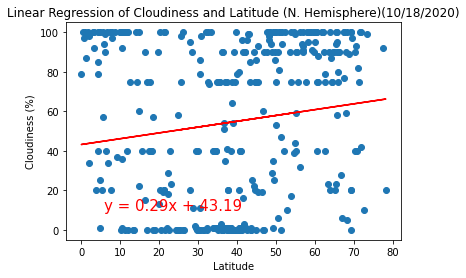

In [18]:
#define variables
north_cloud = north_hemi["Cloudiness"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_cloud, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_cloud
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Cloudiness_vs_Lat_regression.png")

#display chart
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07


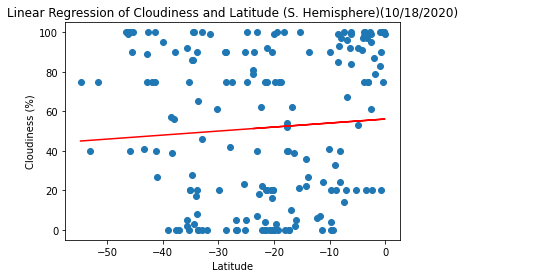

In [19]:
#define variables
south_cloud = south_hemi["Cloudiness"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_cloud, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_cloud
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Cloudiness_vs_Lat_regression.png")

#display chart
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1


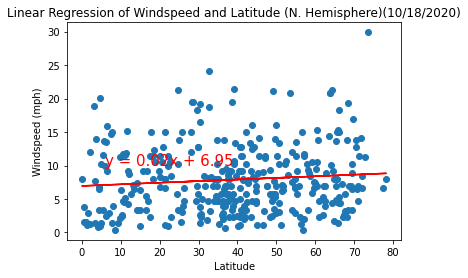

In [20]:
#define variables
north_wind = north_hemi["Windspeed"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_wind, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_wind
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Windspeed_vs_Lat_regression.png")

#display chart
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18


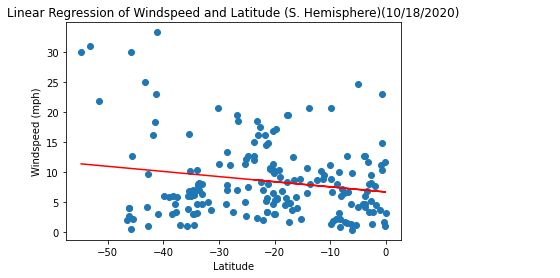

In [21]:
#define variables
south_wind = south_hemi["Windspeed"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_wind, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_wind
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Windspeed_vs_Lat_regression.png")

#display chart
plt.show()